1.Preproccessing + EDA + Feature Selection<br>
2.Extract input and output cols<br>
3.Scale the value<br>
4.Train test split<br>
5.Train the model<br>
6.Evaluate the model/model Selection<br>
7.Deploy the model

@rohitbedse_

In [49]:
import pandas as pd
df = pd.read_csv("placement-dataset.csv")

In [50]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [51]:
df.tail()

,Unnamed: 0,cgpa,iq,placement
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1
99,99,6.2,113.0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


1. Preproccessing + EDA + Feature Selection

In [54]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [56]:
import matplotlib.pyplot as plt

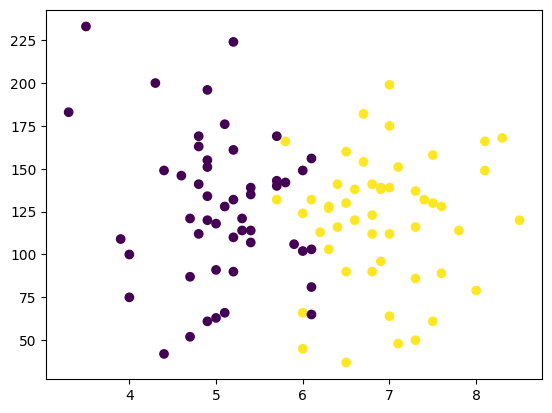

In [58]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

2. Extract input and output cols

In [59]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]
y.shape

(100,)

In [60]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


4. Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, )

In [101]:
y_train.shape

(70,)

3. Scale the value

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [103]:
X_train = scaler.fit_transform(X_train)
X_train[:30,:]

array([[-0.01815516, -2.13060824],
       [ 0.9138099 , -2.05187734],
       [-0.52649974,  0.2313189 ],
       [-1.03484432,  1.12360248],
       [ 0.32074122,  0.3887807 ],
       [-0.01815516, -1.57949191],
       [-0.95012022,  0.20507526],
       [-0.18760336,  0.41502434],
       [-2.30570576,  1.49101337],
       [-1.03484432,  0.96614067],
       [-0.01815516,  0.59872978],
       [-0.95012022, -0.16233563],
       [ 0.57491351,  1.46476973],
       [ 0.06656893,  0.15258799],
       [-1.03484432, -0.37228471],
       [-0.78067203,  1.30730792],
       [ 0.32074122, -0.26731017],
       [ 0.8290858 , -0.37228471],
       [ 1.33743038,  0.04761345],
       [-0.01815516, -0.05736109],
       [-0.18760336,  1.04487158],
       [ 0.8290858 ,  0.33629344],
       [-1.11956842, -1.9469028 ],
       [ 1.25270628,  0.8349225 ],
       [ 1.08325809, -0.26731017],
       [-0.69594793,  0.15258799],
       [ 1.76105086,  1.04487158],
       [-1.79736119, -0.45101561],
       [ 0.06656893,

In [104]:
X_test = scaler.transform(X_test)
X_test

array([[-0.95012022,  0.65121705],
       [-0.69594793,  2.5670024 ],
       [ 0.15129303, -0.34604107],
       [-0.61122384, -0.13609199],
       [ 0.9138099 ,  0.65121705],
       [-0.86539613, -1.65822281],
       [ 1.25270628, -1.71071008],
       [ 0.06656893,  0.78243523],
       [ 0.40546532,  0.10010072],
       [-0.69594793,  0.9136534 ],
       [-0.52649974,  0.33629344],
       [ 1.08325809, -1.99939007],
       [-0.27232745,  0.36253707],
       [ 0.40546532,  0.88740977],
       [-0.69594793, -0.42477198],
       [ 0.23601713,  0.02136982],
       [-1.11956842, -0.13609199],
       [ 1.25270628,  0.10010072],
       [-0.52649974, -0.50350288],
       [-1.11956842, -1.02837558],
       [ 0.7443617 ,  0.33629344],
       [ 1.50687857, -0.31979744],
       [-0.78067203, -1.57949191],
       [ 0.06656893, -1.60573554],
       [ 0.7443617 , -0.79218286],
       [ 0.8290858 ,  1.91091153],
       [-1.3737407 , -2.20933914],
       [-1.71263709, -0.68720832],
       [-0.95012022,

5. Train the model

In [105]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [106]:
clf.fit(X_train,y_train)

LogisticRegression()

In [107]:
y_prec = clf.predict(X_test)
y_prec

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1])

In [108]:
# To find prediction accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_prec)

0.9333333333333333

In [109]:
# To see how model divide the dataset

from mlxtend.plotting import plot_decision_regions

<Axes: >

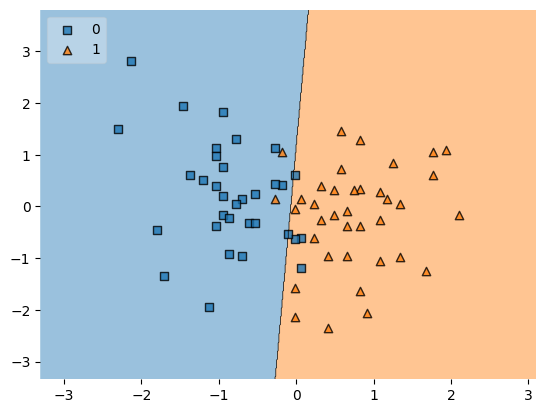

In [110]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [111]:
# Pickle is library used for to make file of trained model to use it in many place

import pickle

In [113]:
pickle.dump(clf, open('model.pkl', 'wb'))